In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline


In [209]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10


In [210]:
df=pd.read_csv("Fish.csv")

In [211]:
df.head(10)


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [213]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


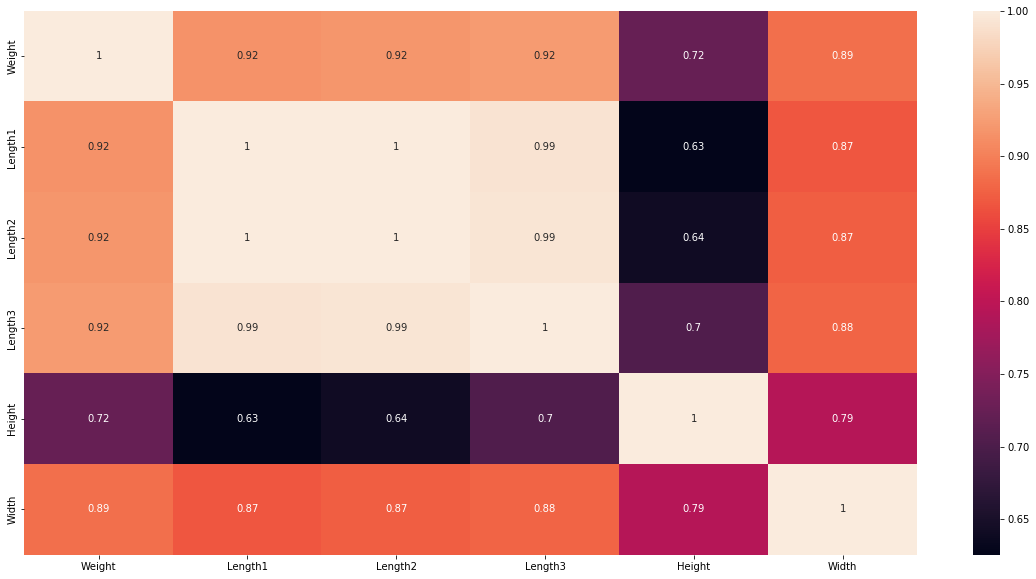

In [214]:
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f794efb6b50>,
      dtype=object)

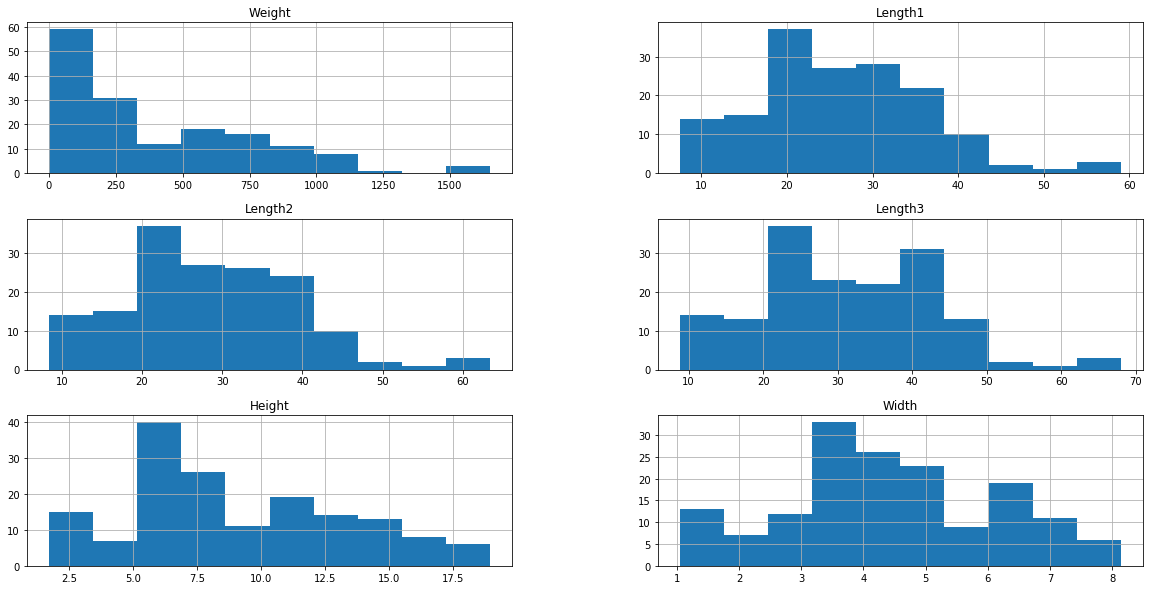

In [215]:
df.hist()

In [216]:
del df['Species']

In [217]:
df['Weight']=df['Weight'].astype(float)

In [218]:
df['Length1']=df['Length1'].astype(float)

In [219]:
df['Height']=df['Height'].astype(float)

In [220]:
df['Width']=df['Width'].astype(float)

In [221]:
df['Length2']=df['Length2'].astype(float)

In [222]:
df['Length3']=df['Length3'].astype(float)

In [223]:
def train_test_split(X):
    X = X.sample(frac=1)
    TRAIN_SIZE = int(0.8 * len(X))
    train, test = X.iloc[:TRAIN_SIZE, :], X.iloc[TRAIN_SIZE:, :]

    train_y, test_y = train.pop("Weight"), test.pop("Weight")

    return (train.to_numpy(), test.to_numpy(), train_y.to_numpy(), test_y.to_numpy())

x_train, x_test, y_train, y_test = train_test_split(df)


In [224]:
class MyLinearReg:
    def __init__(self):
        self.coefs = np.random.randn(1, len(x_train[0])) # random vals for each parameter coeff
        self.slope = 0 # slope starts at 0
        self.predictions = []

    def forward_prop(self, X):
        # matrix multiplication between coeffs and X
        # X.shape = n * m   coefs.shape = 1 * n     z.shape = 1 * m
        z = np.dot(self.coefs, X) + self.slope
        self.predictions = z
        # adding the bias AKA slope
        # z --> predicted vals
        return z
    
    def cost_func(self, z, y):
        # z-> predicted y-> truth
        m = len(y) # m vals (number of vals)
        J = (1/(2 * m)) * np.sum(np.square(z - y)) # getting squared errors
        # multiplying by reciprocal of 2m for cost func
        return J

    def back_prop(self, X, y, z):
        m = len(y) # m vals (number of vals)
        d_coeffs =  (-2 / m) * np.sum((y - z) * X) #gradient of coeffs
        d_slope = (-2 / m) * np.sum((y - z)) #gradient of slopee
        return d_coeffs, d_slope
    
    def gradient_descent_update(self, d_coeffs, d_slope, lr):
        #updating gradients
        self.coefs = self.coefs - (lr * d_coeffs)
        self.slope = self.slope - (lr * d_slope)
    
    def normalise_vals(self, arr):
        arr = arr - arr.mean(axis=0)
        arr = arr / np.abs(arr).max(axis=0)
        return arr

    def fit(self, x_train, y_train, x_test, y_test, lr, epochs):
        """
        given X and y fitting a linear reg
        """
        x_train = self.normalise_vals(x_train)
        x_test = self.normalise_vals(x_test)

        cost_train_vals = []
        cost_test_vals = []

        MAE_train_vals = []
        MAE_test_vals = []

        m_train = len(y_train)
        m_val = len(y_test)

        for epoch in range(1, epochs + 1):
            z_train = self.forward_prop(x_train)
            cost_train = self.cost_func(z_train, y_train)
            dw, db = self.back_prop(x_train, y_train, z_train)
            self.gradient_descent_update(dw, db, lr)

            #Mean absolute error MAE
            MAE_train = (1 / m_train) * np.sum(np.abs(z_train - y_train))

            #validation set
            z_val = self.forward_prop(x_test)
            cost_val = self.cost_func(z_val, y_test)
            MAE_val = (1 / m_val) * np.sum(np.abs(z_val - y_test))
            
            #storing vals for graphing
            cost_train_vals.append(cost_train)
            cost_test_vals.append(cost_val)

            MAE_train_vals.append(MAE_train)
            MAE_test_vals.append(MAE_val)

            #prinitng out
            if epoch % 10 == 0:
                print(f"EPOCHS {epoch} / {epochs} training MAE {MAE_train} validation MAE {MAE_val} training cost {cost_train} validation cost {cost_val}")
        
        # plotting graph
        fig, ax = plt.subplots(1, 2)
        
        ax[0].plot(cost_train_vals)
        ax[0].scatter([x for x in range(len(cost_train_vals))], cost_train_vals, label="train_set")
        ax[0].scatter([x for x in range(len(cost_test_vals))], cost_test_vals, label="test_set")
        ax[0].plot(cost_test_vals)
        ax[0].title.set_text('Cost')
        ax[0].legend()

        ax[1].plot(MAE_train_vals)
        ax[1].scatter([x for x in range(len(MAE_train_vals))], MAE_train_vals, label="train_set")
        ax[1].scatter([x for x in range(len(MAE_test_vals))], MAE_test_vals, label="test_set")
        ax[1].plot(MAE_test_vals)
        ax[1].title.set_text('MAE')
        ax[1].legend()


        return (self.slope, self.coefs)
    
    def R2_val (self, X, y):
        m = len(y)
        z = np.dot(self.coefs, X.T) + self.slope

        # variation across line
        ss = np.sum((y - z) **2)
        ss /= m

        # variation across mean
        mean = np.mean(y)
        var_mean = np.sum((y - mean) ** 2)
        var_mean /= m 

        print(f"var across line {ss} || var across mean {var_mean}")
        r2 = 1 - ss / var_mean
        return abs(r2)


EPOCHS 10 / 50 training MAE 323.9906977654902 validation MAE 434.20174285775016 training cost 108558.52701566288 validation cost 161648.03670430134
EPOCHS 20 / 50 training MAE 287.8190944658211 validation MAE 399.0620168278002 training cost 92211.12965928018 validation cost 139995.87803671538
EPOCHS 30 / 50 training MAE 272.19822017309286 validation MAE 376.31138869855977 training cost 81297.47686671096 validation cost 124651.09193212443
EPOCHS 40 / 50 training MAE 267.104647323805 validation MAE 361.0683699779282 training cost 74011.43526142449 validation cost 113679.89598420422
EPOCHS 50 / 50 training MAE 264.89398804895814 validation MAE 351.48428520956196 training cost 69147.21580319596 validation cost 105761.51244593697


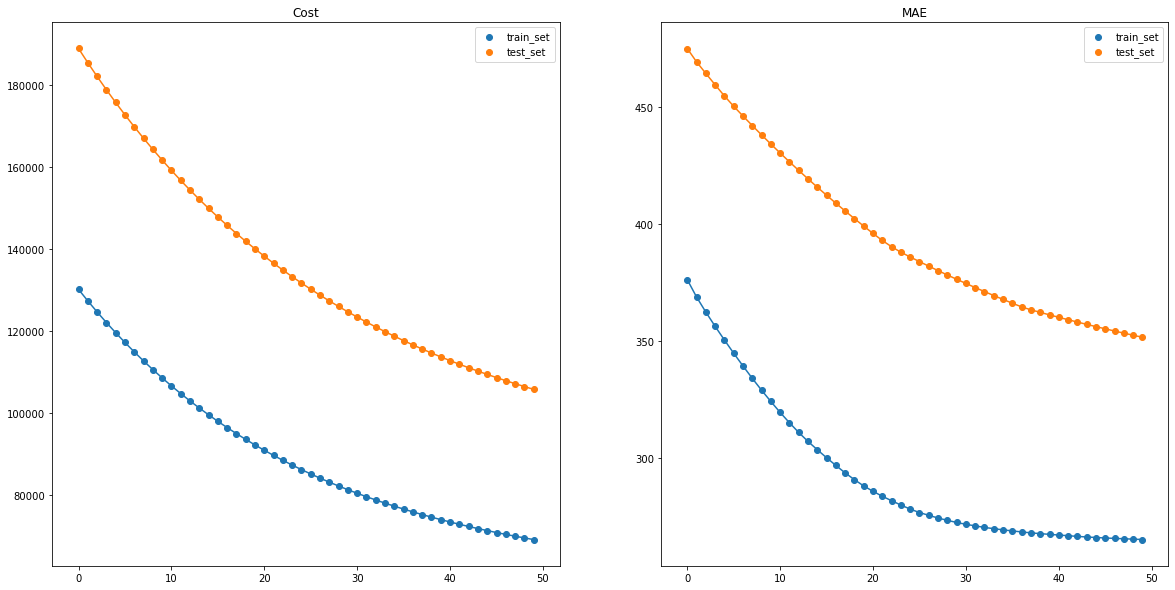

In [249]:
linearReg = MyLinearReg()
LEARNING_RATE = 0.01
EPOCHS = 50
slope, coeff = linearReg.fit(x_train.T, y_train, x_test.T, y_test, LEARNING_RATE, EPOCHS)


In [250]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [251]:
 slope, coeff


(239.17763102979356,
 array([[ 0.43680757,  0.29248651, -1.74723084, -1.13083673, -0.99469519]]))

In [252]:
r2 = linearReg.R2_val(x_test, y_test)
print("-"*20)
print(f"R SQUARED = {r2}")


var across line 255049.47551292466 || var across mean 152521.91561523438
--------------------
R SQUARED = 0.6722152648301087


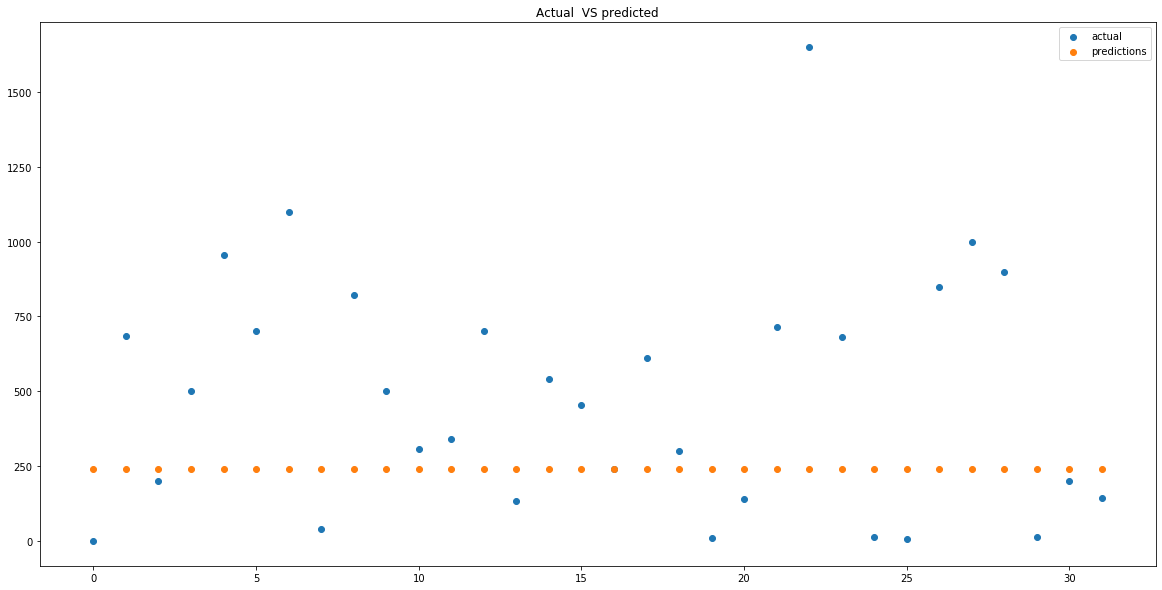

In [253]:
fig, ax = plt.subplots()
ax.scatter([x for x in range(y_test.shape[0])], y_test, label="actual")
ax.scatter([x for x in range(linearReg.predictions.shape[1])], linearReg.predictions, label = "predictions")
ax.legend()
plt.title("Actual  VS predicted")
plt.show()
 

In [254]:
 from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)


In [255]:
 print(f"{model.intercept_}\n{model.coef_}")


-489.0096632239906
[ 67.88346422 -10.7507045  -29.56369354  28.46849806  16.50488414]


In [256]:
 print(f"Model score (R squared) val with training set {model.score(x_train, y_train)}")
print("--"*20)
print(f"Model score (R squared) val with testing set {model.score(x_test, y_test)}")


Model score (R squared) val with training set 0.8879590329135785
----------------------------------------
Model score (R squared) val with testing set 0.8674518406443346


In [102]:
df.describe()

,Species,Weight,Length1,Length2,Length3,Height,Width
count,159,159,159,159,159,159,159
unique,7,101,116,93,124,154,152
top,Perch,300.0,19.0,22.0,23.5,2.2139,3.525
freq,56,6,6,7,5,2,3


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Species  159 non-null    object
 1   Weight   159 non-null    object
 2   Length1  159 non-null    object
 3   Length2  159 non-null    object
 4   Length3  159 non-null    object
 5   Height   159 non-null    object
 6   Width    159 non-null    object
dtypes: object(7)
memory usage: 8.8+ KB
